##### John Franklin Crenshaw

Physics 566 Problem Set 2

January 31, 2018

In [547]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

In [81]:
# My plot preferences
plt.rc('font', family='serif')
plt.rc('axes', labelsize='x-large')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
plt.rc('axes',titlesize='x-large')
plt.rc('legend',frameon=False)
plt.rc('legend',fontsize='large')
plt.rcParams['figure.figsize'] = (8,6)

# for better looking inline plots
%config InlineBackend.figure_format = 'retina'

***
#### (1) CP 5.3
###### *Plotting the Gaussian Error Function*

The Gaussian error function is defined by $E = \int_0^x e^{-t^2} dt$. Below I write a function to calculate its value. I perform the integral using the trapezoid function, using the formula discussed in the previous problem set.

In [264]:
# Trapezoid integration function
def trap_rule(x,y):
    """Approximate the integral of y(x) using the trapezoid rule.
    Note it assumes that the x samples are evenly spaced."""
    
    h = (x[-1] - x[0])/(len(x)-1) # trap width
    return h*(0.5*y[0] + 0.5*y[-1] + sum(y[1:-1]))

In [45]:
# The Gaussian Error Function
def E(x):
    """Gaussian error function. Uses the trapezoid rule for integration."""
    
    try: # if x is a scalar
        t = np.linspace(0,x,10000)
        y = np.exp(-t**2)
        return trap_rule(t,y)
    
    except: # if x is an array
        result = [] # array of results
        for i in x:
            t = np.linspace(0,i,10000)
            y = np.exp(-t**2)
            result.append(trap_rule(t,y))
        return result
            

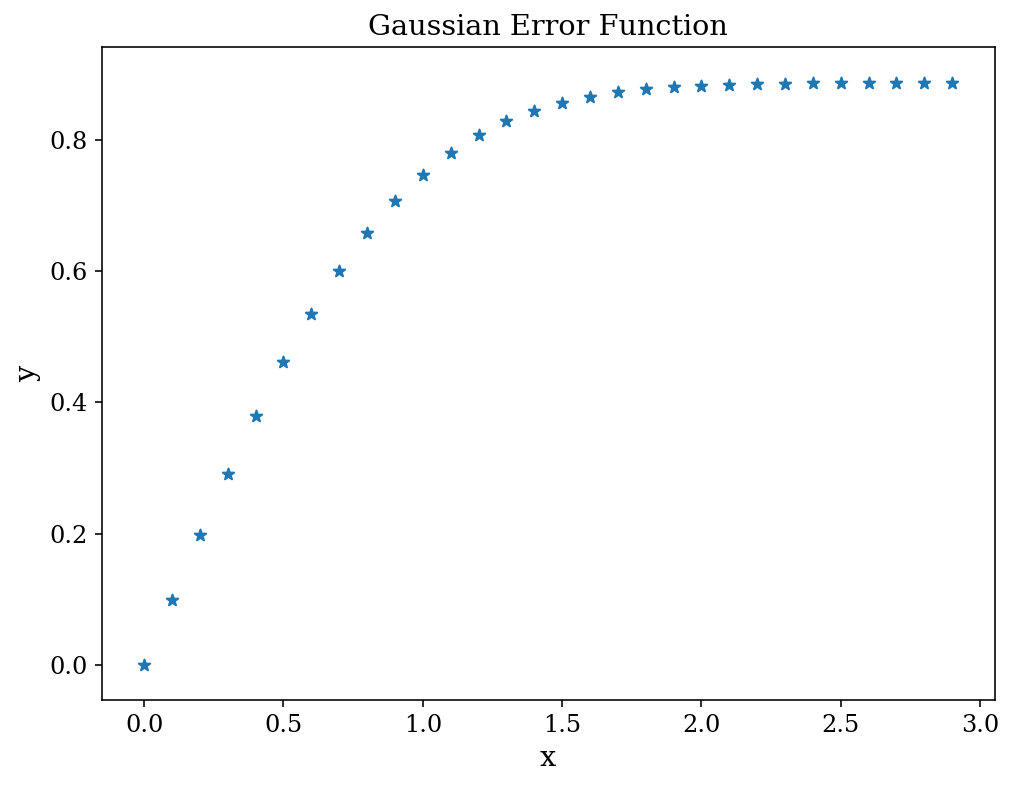

In [82]:
# Plot the gaussian error function from 0 -> 3, steps of 0.1
fig1,ax1 = plt.subplots(1,1)

x = np.arange(0,3,0.1)
y = E(R)

ax1.scatter(x,y,marker='*') # plot stars for fun

ax1.set_title("Gaussian Error Function")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

plt.show()

***
#### (2) CP 5.4
###### *The diffraction limit of a telescope*

Our ability to resolve point objects in the sky (e.g. distant stars and galaxies) is limited by diffraction. A point source appears on the focal plane as a series of concentric rings whose intensity is described by the function
$$ I(r) = \left( \frac{J_1(kr)}{kr} \right)^2, $$
where $r$ is the distance from the center of the diffraction pattern, $k$ is the wavenumber of the light, and $J_1$ is a Bessel function. The Bessel functions $J_m(x)$ are given by
$$ J_m = \frac{1}{m} \int_0^{\pi} \cos(\theta - x \sin{\theta})d\theta,$$
where $m$ is a non-negative integer and $x \geq 0$.

Below I use Simpson's Rule to calculate $J_m(x)$ and plot the first three Bessel functions. Then I use $J_1$ to make a density plot of the diffraction pattern of a point source with $\lambda = 500$ nm.

In [53]:
# Simpson's Rule integration function
# this function uses the formula for Simpson's rule that was
# introduced in the last problem set

def simps_rule(x,y):
    """Approximate the integral of y(x) using Simpson's rule.
    Note it assumes that the x samples are evenly spaced."""
    
    # if len(x) is even, then there are an odd number of slices
    # Simpson's rule needs an even number of slices
    if len(x) % 2 == 0: # if len(x) is even, complain
        raise Exception("Simpson's Rule requires an even number of slices. "+
                       "This means len(x) must be odd.")
    else:
        Y = np.copy(y) # make a copy of y so that input y isn't changed
        Y[1:-1:2] *= 4 # multiply odd entries by 4, except first/last
        Y[2:-1:2] *= 2 # multiply even entries by 2, except first/last
        h = (x[-1] - x[0])/(len(x)-1) # x spacing
        return 1/3*h*sum(Y)

In [65]:
# Bessel Function
def bessel(m,x):
    """Calculate J_m(x) where J_m is the mth Bessel function."""

    try: # if x is a scalar
        theta = np.linspace(0,np.pi,1001) # domain
        y = np.cos(m*theta-x*np.sin(theta)) # integrand
        return 1/np.pi*simps_rule(theta,y) # calculate

    except: # if x is an array
        result = [] # array of results
        for i in x:
            theta = np.linspace(0,np.pi,1001) # domain
            y = np.cos(m*theta-i*np.sin(theta)) # integrand
            result.append(1/np.pi*simps_rule(theta,y)) # append calculation
        return result

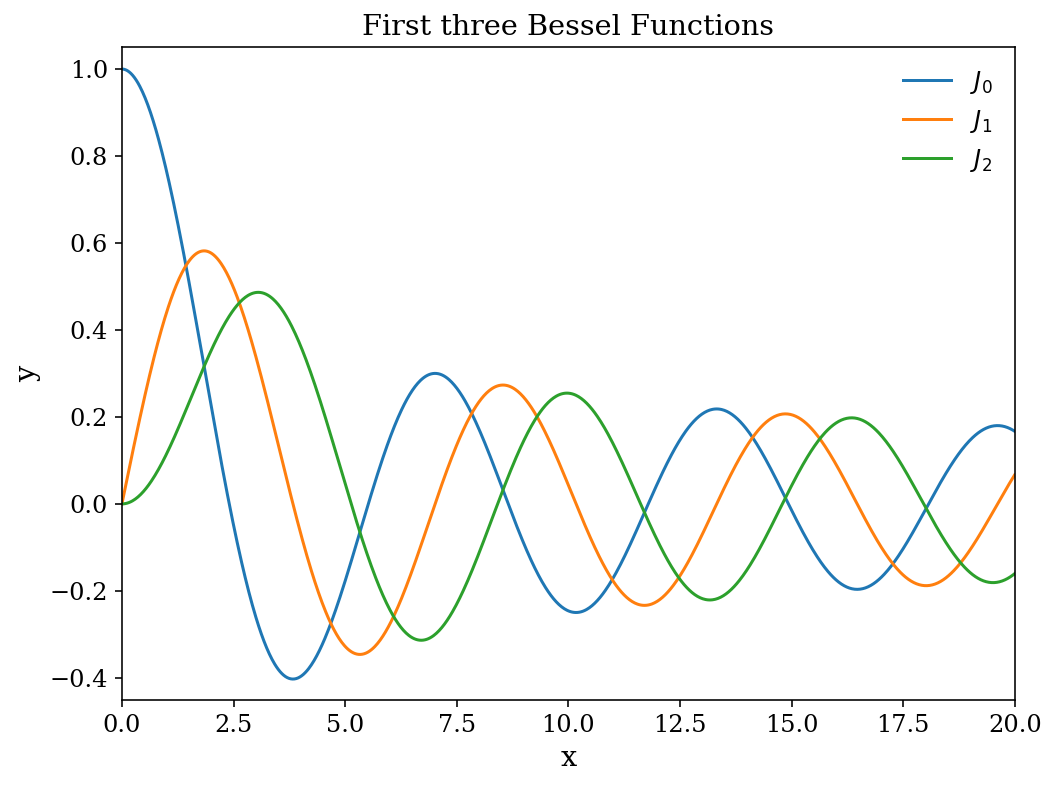

In [85]:
# Plot of the first three Bessel functions
fig2,ax2 = plt.subplots(1,1)

x = np.linspace(0,20,1000)

# Bessel Functions
ax2.plot(x,bessel(0,x),label='$J_0$')
ax2.plot(x,bessel(1,x),label='$J_1$')
ax2.plot(x,bessel(2,x),label='$J_2$')

ax2.legend()

ax2.set_title("First three Bessel Functions")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

ax2.set_xlim(0,20)
ax2.set_ylim(-0.45,1.05)

plt.show()

Now I will plot the diffraction pattern

In [142]:
# set parameters
wavelength = 500e-9 # meters
radius = 1e-6 # plot radius, meters
nsamples = 200

k = 2*np.pi/wavelength # wave number

# grid of intensities
grid = np.empty([nsamples,nsamples],float)

# iterate across plane
for i,x in enumerate(np.linspace(-1*radius,radius,nsamples)):
    for j,y in enumerate(np.linspace(-1*radius,radius,nsamples)):
        r = np.sqrt(x**2 + y**2) # calculate distance
        grid[i,j] = (bessel(1,k*r)/(k*r))**2 # calc. intensity

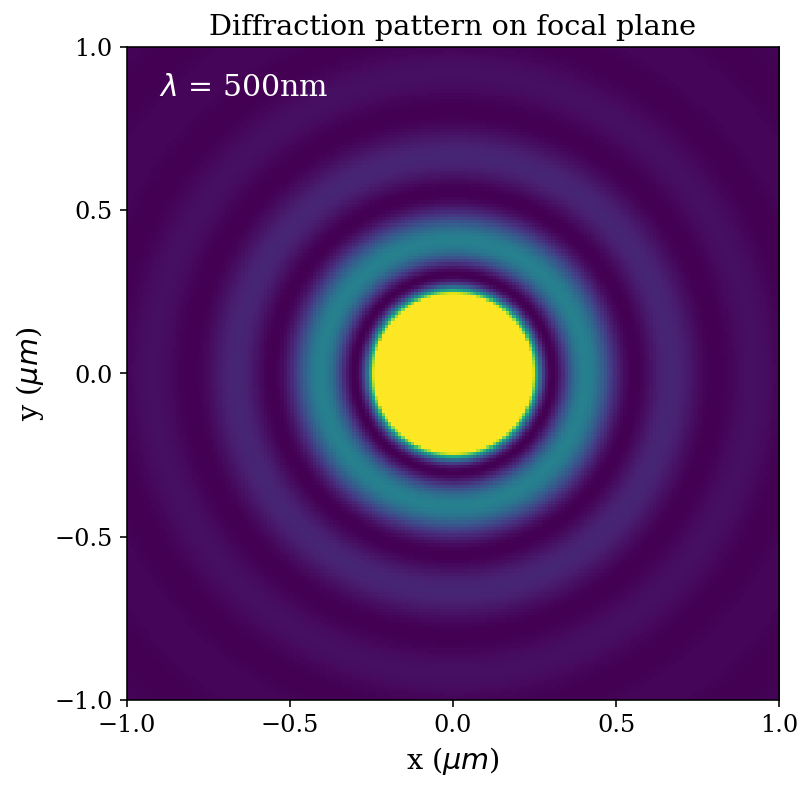

In [204]:
# Plot of diffraction pattern
fig3,ax3 = plt.subplots(1,1)

# plot
ax3.imshow(grid,vmax=0.01,origin='lower',extent=[-1,1,-1,1])

# aesthetics
ax3.set_title("Diffraction pattern on focal plane")
ax3.set_xlabel("x ($\mu m$)")
ax3.set_ylabel("y ($\mu m$)")
ax3.set_xticks([-1,-0.5,0,0.5,1])
ax3.set_yticks([-1,-0.5,0,0.5,1])
ax3.text(-0.9,0.85,'$\lambda$ = 500nm',color='w',fontsize=15)

plt.show()

***
#### (3) CP 5.7
###### *Adaptive Integration and Romberg Integration*

In general, it is desirable when integrating to continously add higher order corrections until a certain level of precision is met. With trapezoid integration, this can be achieved by continuously adding more and more "sample points" to the calculation. With each iteration, you double the number of points used in the calculation, and estimate the error with
$$ \epsilon = \frac{1}{3}(I_i - I_{i-1}), $$
Where $I_i$ is the integral from the $i^{th}$ doubling. When $\epsilon$ falls below the desired tolerance, the process can be stopped. This process is known as adaptive integration.

Romberg Integration goes one step further, and adds the estimated error to the integral to improve the estimate. Let $R_{i,1}$ be the estimate from the $i^{th}$ doubling. Then one can add higher order errors using the formula
$$ R_{i,m+1} = R_{i,m} + \frac{1}{4^m-1} (R_{i,m} - R_{i-1,m}).$$

By doubling the points via adaptive integration, and adding higher order error terms to the integral, one can achieve very high precision with very few points. This process is described in detail in the text.

Here I use both methods to estimate the integral $\int_0^1 \sin^2 \sqrt{100x} dx$

In [532]:
# the function to be integrated
f = lambda x: np.sin(np.sqrt(100*x))**2

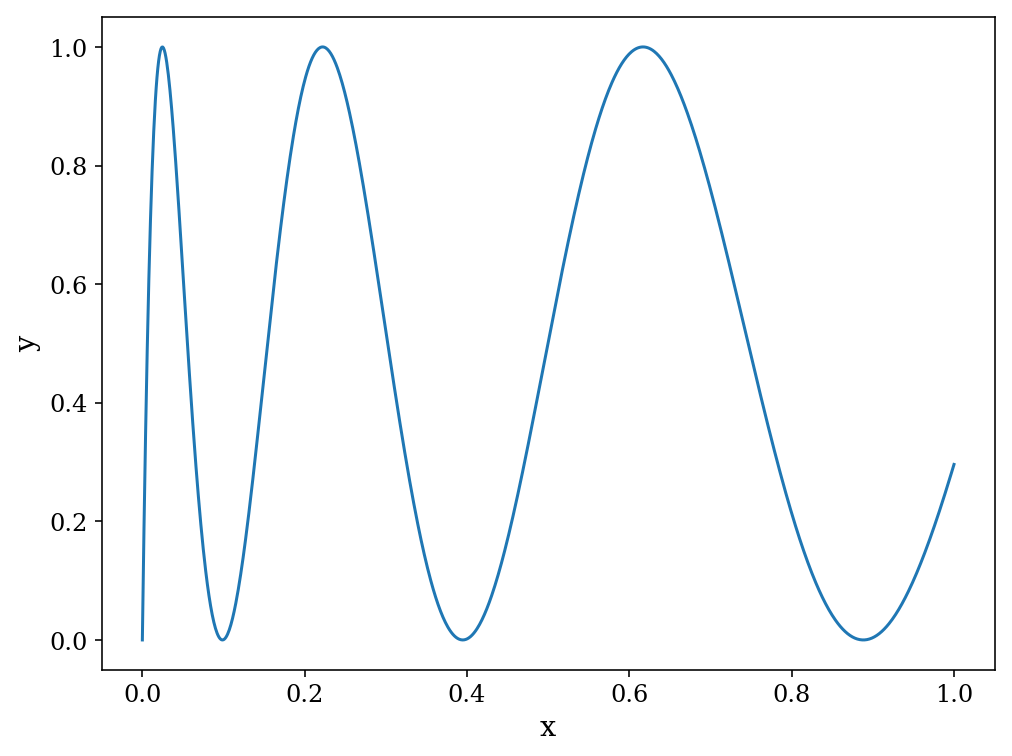

In [538]:
# visualize the function to be integrated
fig4,ax4 = plt.subplots(1,1)
x = np.linspace(0,1,1000)
ax4.plot(x,f(x))
ax4.set_xlabel('x')
ax4.set_ylabel('y')
plt.show()

Integral using adaptive trapezoidal rule:

In [393]:
def adaptive_int(f,a,b,tolerance,N=1,verbose=0):
    """Integrates f(x) from a to b using the adaptive trapezoid rule. 
    
    Integrates with the trapezoid rule, starting with N slices.
    Progressively adds more slices until error is less than tolerance.
    If verbose == 1, details of each step are printed."""
    
    x = np.linspace(a,b,N+1) # initial slices
    
    # initial estimate
    h = x[1]-x[0] # trapezoid width
    y = f(x)
    result_old = h*(0.5*y[0] + 0.5*y[-1] + sum(y[1:-1]))
    if verbose == 1:
        print("{0:<11}{1:<13}{2:<10}".format("Slices","Estimate","Error"))
        print("{0:<10}{1:< 12.6f}{2:<10}".format(N,result_old,' '))
    
    # First Correction:
    # Add points between all initial points
    x0 = np.mean([a,x[1]]) # new starting point
    xf = np.mean([x[-2],b]) # new ending point
    x = np.linspace(x0,xf,N) # new sample points
    # calcuate correction from new points
    h /= 2 # new trapezoid width
    result_new = 1/2*result_old + h*sum(f(x))
    err = 1/3*(result_new-result_old)
    if verbose == 1:
        print("{0:<10}{1:< 12.6f}{2:< 10.6f}".format(N*2,result_new,err))
    
    # if error is less than tolerance,
    # continue to add higher level corrections.
    while abs(err) >= abs(tolerance):
        result_old = result_new
        x0 = np.mean([a,x[0]]) # new starting point
        xf = np.mean([x[-1],b]) # new ending point
        N *= 2 # new number of samples
        x = np.linspace(x0,xf,N)
        h /= 2 # new trapezoid width
        result_new = 1/2*result_old + h*sum(f(x))
        err = 1/3*(result_new-result_old)
        if verbose == 1:
            print("{0:<10}{1:< 12.6f}{2:< 10.6f}".format(N*2,result_new,err))
    
    return result_new

In [400]:
adaptive_int(f,0,1,1e-6,verbose=1);

Slices     Estimate     Error     
1          0.147979             
2          0.325232    0.059084 
4          0.512283    0.062350 
8          0.402997   -0.036428 
16         0.430103    0.009035 
32         0.448415    0.006104 
64         0.453913    0.001833 
128        0.455349    0.000479 
256        0.455711    0.000121 
512        0.455802    0.000030 
1024       0.455825    0.000008 
2048       0.455831    0.000002 
4096       0.455832    0.000000 


Notice that with this method you must compute the function for 4096 $x$-values to reach the desired precision.

Integral using Romberg Integration:

In [583]:
def romberg(f,a,b,tolerance,N=1,verbose=0):
    """Integrates f(x) from a to b using Romberg integration. 
    
    Integrates with the trapezoid rule, starting with N slices.
    Progressively adds more slices until error is less than tolerance.
    If verbose == 1, the 'Romberg Triangle' is printed."""
    
    R = dict() # dictionary to hold values in Romberg Triangle

    x = np.linspace(a,b,N+1) # initial slices
    
    # initial estimate
    h = x[1]-x[0] # trapezoid width
    y = f(x)
    # store first estimate
    R[1,1] = h*(0.5*y[0] + 0.5*y[-1] + sum(y[1:-1]))
    
    # First Doubling:
    # Add points between all initial points
    x0 = np.mean([a,x[1]]) # new starting point
    xf = np.mean([x[-2],b]) # new ending point
    x = np.linspace(x0,xf,N) # new sample points
    # calcuate correction from new points
    h /= 2 # new trapezoid width
    # store second estimate
    R[2,1] = 1/2*R[1,1] + h*sum(f(x))
    # calculate error
    err = 1/3*(R[2,1]-R[1,1])
    # add error to estimate to improve it
    R[2,2] = R[2,1] + err

    
    # if error is less than tolerance,
    # continue to add higher level corrections.
    # I will continue to double the points sampled, as well
    # as adding in the error terms. Process explained in the text.
    i = 2 # we're about to start at i=3
    while abs(err) >= abs(tolerance):
        i += 1 # next level in the triangle
        
        x0 = np.mean([a,x[0]]) # new starting point
        xf = np.mean([x[-1],b]) # new ending point
        N *= 2 # new number of samples
        x = np.linspace(x0,xf,N)
        
        h /= 2 # new trapezoid width
        # new estimate from doubling
        R[i,1] = 1/2*R[i-1,1] + h*sum(f(x))
        
        # now compute errors by moving right across the triangle
        # add these errors to the estimate
        for m in range(1,i):
            # error is proportional to the difference between
            # the value to the left and the value 1 left, 1 up
            err = 1/(4**m-1)*(R[i,m]-R[i-1,m])
            # add error to estimate for better estimate
            R[i,m+1] = R[i,m] + err
    
    # If verbose ==1, print 'Romberg Triangle'
    if verbose == 1:
        
        # header
        header = '{0:<6}'.format("R(i,m)")
        for column in range(1,i+1):
            header += '{0:^ 12}'.format(column)
        print(header)
        
        # Print each row of the triangle, adding each column
        for row in range(1,i+1):
            line = '{0:^6}'.format(row)
            for column in range(1,row+1):
                line += '{0:^ 12.6g}'.format(R[row,column])
            print(line)

    # return most accurate value
    return R[i,m+1]

In [584]:
romberg(f,0,1,1e-6,verbose=1);

R(i,m)      1           2           3           4           5           6           7     
  1     0.147979  
  2     0.325232    0.384316  
  3     0.512283    0.574633    0.587321  
  4     0.402997    0.366569    0.352698    0.348974  
  5     0.430103    0.439139    0.443977    0.445426    0.445804  
  6     0.448415    0.454518    0.455544    0.455727    0.455768    0.455777  
  7     0.453913    0.455746    0.455828    0.455832    0.455832    0.455832    0.455832  


Notice with this method, you only need to compute the function for $2^6 = 64$ $x$-values. If we were integrating a function for which it took a long time to calculate each value, this method would achieve the desired precision *much* faster. 

***
#### (4) CP 5.9
###### *Calculating the heat capacity of aluminum using Gaussian Quadrature.*

Gaussian Quadrature is an integration technique that uses unevenly spaced points, which more complicated weightings than those used in the Trapezoid or Simpson's rules. For an integral using $N$ samples, points are selected as the zeros of the $N^{th}$ order Legendre Polynomial, and the weights are calculated from the first derivative of the Polynomial. One must merely look up $x$'s and $w$'s for the desired number $N$, and rescale them to the domain $(a,b)$. Gaussian Quadrature allows exact integration for polynomials of order $2D-1$. More details are found in the text.

In [563]:
# Function for gaussian quadrature
def gauss_quad(f,a,b,N):
    """Integrate f(x) from a to b using N-sample Gaussian Quadrature."""
    
    # get x-vals and weights from the Nth Legendre Poly.
    x,w = np.polynomial.legendre.leggauss(N)
    
    # rescale them to my domain
    x = 1/2*(b-a)*x + 1/2*(b+a)
    w = 1/2*(b-a)*w
    
    # perform the integral
    return(sum(w*f(x)))

I will use Gaussian Quadrature to calculate the Heat Capacity of a mass of aluminum as a function of temperature $T$. This is given by the function
$$ C_V = 9 V \rho k_B \left( \frac{T}{\theta_D} \right)^3 \int_0^{\theta_D\ /\ T} \frac{x^4 e^x}{(e^x - 1)^2} dx, $$
where $V$ is the volume, $\rho$ the number density, $k_B$ Boltzmann's constant, and $\theta_D$ the Debye temperature.

In [581]:
# Function to calculate specific heat of aluminum as a function of T

# integrand for the function
cv_integrand = lambda x: x**4*np.exp(x)*(np.exp(x)-1)**(-2)

def cv(T):
    """Calculate specific heat of aluminum as a function of T."""
    V = 0.001 # m^3
    rh = 6.022e28 # 1/m^3
    k = constants.Boltzmann
    th = 428 # kelvin
    try: # iterate if T is an array
        return [9*V*rh*k*(t/th)**3*gauss_quad(cv_integrand,0,th/t,50) for t in T]
    except: # just calculate if T is a scalar
        return 9*V*rh*k*(T/th)**3*gauss_quad(cv_integrand,0,th/T,50)

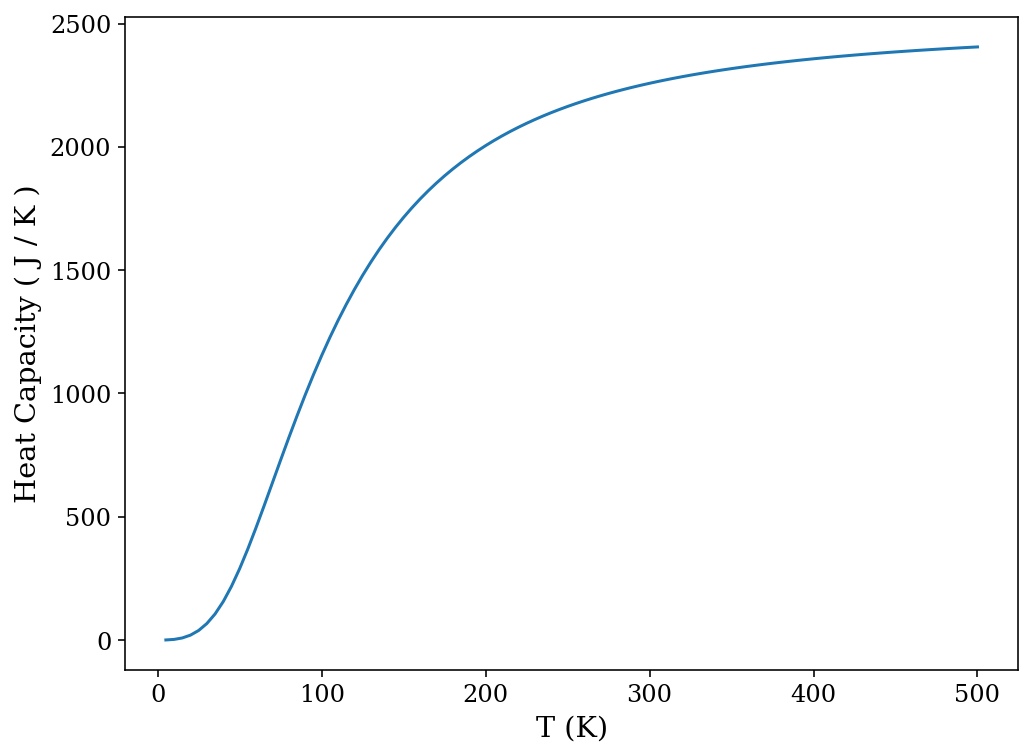

In [582]:
# Specific heat of aluminum as a function of temperature
fig5,ax5 = plt.subplots(1,1)
T = np.linspace(5,500,100)
ax5.plot(T,cv(T))
ax5.set_xlabel('T (K)')
ax5.set_ylabel('Heat Capacity ( J / K )')
plt.show()